# Sarcasm Detection

In [ ]:
# data manipulation libraries
import pandas as pd
import numpy as np

# import different metrics to evaluate the classifiers
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_auc_score

# pre-processing of text
import string
import re

In [2]:
## loading  
from models import naive_bayes, logistic_regression, svm

from representations import embedding_feats ## returns vector representation of all the documents
from representations import make_embedding_dict
from representations import BoW_representation, tf_idf_representation, word2Vec

In [42]:
from utils import clean, plot_confusion_matrix, get_confusion_matrix, print_metrics

In [5]:
data_s = pd.read_json('data/Sarcasm_Headlines_Dataset.json', lines= True)
data_s.shape

(26709, 3)

In [6]:
data_s.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


## Some basic EDA and data cleaning

In [7]:
## checking duplicate rows existence 
data_s.duplicated().sum()

## there's one duplicate row

1

In [8]:
## Dropping duplicates rows
data_s.drop_duplicates(inplace=True)
print('dataframe shape: ', data_s.shape)

dataframe shape:  (26708, 3)


In [9]:
## checking duplicates in the headline column 
data_s[['headline']].duplicated().sum()

106

In [10]:
## Removing rows with duplicates headlines since keeping duplicates in headline gives model no useful infoemation
data_s.drop_duplicates(subset='headline', keep='last', inplace=True)
print('dataframe shape: ', data_s.shape)

dataframe shape:  (26602, 3)


In [11]:
print('Dataset size after cleaning: ',data_s.shape)
print('Number of unique articles link: '+str(data_s['article_link'].unique().shape[0]))
print('Number of unique headline: '+ str(data_s['headline'].unique().shape[0]))

Dataset size after cleaning:  (26602, 3)
Number of unique articles link: 26602
Number of unique headline: 26602


In [12]:
print('Sarcastic Comments: ', data_s['is_sarcastic'].value_counts()[1])
print('Non-Sarcastic Comments: ', data_s['is_sarcastic'].value_counts()[0])
print()
print('Sarcastic Comments percentage: ', data_s['is_sarcastic'].value_counts()[1]/data_s.shape[0]*100)
print('Non-Sarcastic Comments percentage: ', data_s['is_sarcastic'].value_counts()[0]/data_s.shape[0]*100)

Sarcastic Comments:  11651
Non-Sarcastic Comments:  14951

Sarcastic Comments percentage:  43.79745883768138
Non-Sarcastic Comments percentage:  56.20254116231862


**From the percentage in both categories, it can be seen that the given data is not imbalanced, and our model will therefore might not suffer from class imbalanced problem**

**To identify wheather a News headline is sarcastic or not, the article link won't prove to be of much help. Therefore, we will drop the column**

In [13]:
data_s.drop(['article_link'], axis= 1, inplace=True)
data_s.head(2)

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0


### Text is already in lowercase

In [14]:
## split the data
## Extract features from the training data using CountVectorizer, which is a bag of words feature implementation. We will use the pre-processing function above in conjunction with Count Vectorizer
## Transform the test data into the same feature vector as the training data
## Train the classifier
## Evaluate the classifier

In [15]:
from sklearn.model_selection import train_test_split

# Step 1: train-test split
X = data_s.headline 
y = data_s.is_sarcastic  
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1) # random_state=1 for reproducibility # 75-25 default split
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(26602,) (26602,)
(19951,) (19951,)
(6651,) (6651,)


## Trying BoW representation

### NB on BoW

In [20]:
# Step 2-3: Preprocess and Vectorize train and test data
X_train_dtm, X_test_dtm = BoW_representation(max_features=10000)

train data: (19951, 10000) test data: (6651, 10000)


Wall time: 11 ms
Prediction at training data
Accuracy:  0.8824119091774848
F1 Score:  0.864846180435534

Prediction at testing data
Accuracy:  0.7947677041046459
F1 Score:  0.7606522882693318


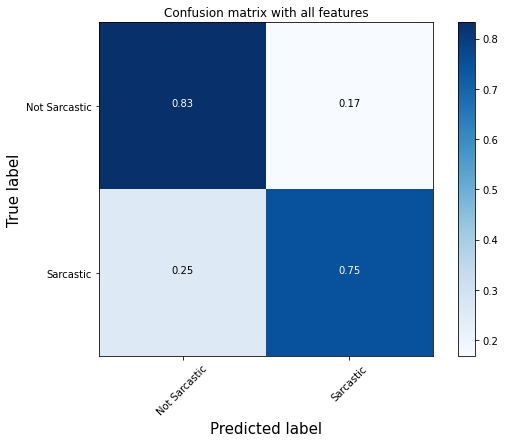

In [21]:
y_pred_class_train, y_pred_class = naive_bayes(X_train_dtm, y_train, X_test_dtm)

# Print accuracy:
print("Prediction at training data")
print_metrics(y_train, y_pred_class_train)
print()
print("Prediction at testing data")
print_metrics(y_test, y_pred_class)
# print the confusion matrix
get_confusion_matrix(y_test, y_pred_class)

In [22]:
## Description
## CountVectorizer() converts a collection of text documents to a matrix of token counts and produces a sparse representation of the counts using scipy.sparse.csr_matrix
## this produces the Bag of Words (BoW) representation of text features

## Reason for MultinomialNB version Naive Bayes: In the sklearn website, it is mentioned that this version of the naive bayes is typically used/empirically better for text classification

In [23]:
## As we can see, the number of features are 23705. This is the vocabulary size the method has obtained after analysing after text data

In [24]:
print(X_train[12897])
print(clean(X_train[12897]))
print(X_train_dtm.toarray()[0].sum())

victoria's secret introduces 3-inch patch of satin to place anywhere on body
victorias secret introduces inch patch satin place body
7


### Logictic regression on BoW

Prediction at training data
Accuracy:  0.9214575710490702
F1 Score:  0.9109000966623074

Prediction at testing data
Accuracy:  0.7899563975342054
F1 Score:  0.757254561251086


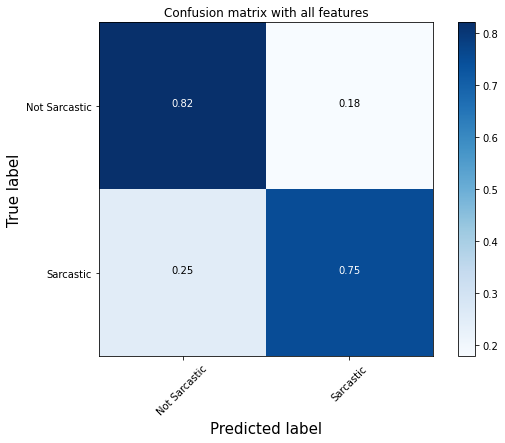

In [25]:
y_pred_class_train, y_pred_class = logistic_regression(X_train_dtm, y_train, X_test_dtm)

# calculate evaluation measures:
print("Prediction at training data")
print_metrics(y_train, y_pred_class_train)
print()
print("Prediction at testing data")
print_metrics(y_test, y_pred_class)

get_confusion_matrix(y_test, y_pred_class)

### SVM on BoW

train data: (19951, 23705) test data: (6651, 23705)
Prediction at training data
Accuracy:  0.9951882111172372
F1 Score:  0.9945174186179325

Prediction at testing data
Accuracy:  0.7752217711622312
F1 Score:  0.7357256496376172


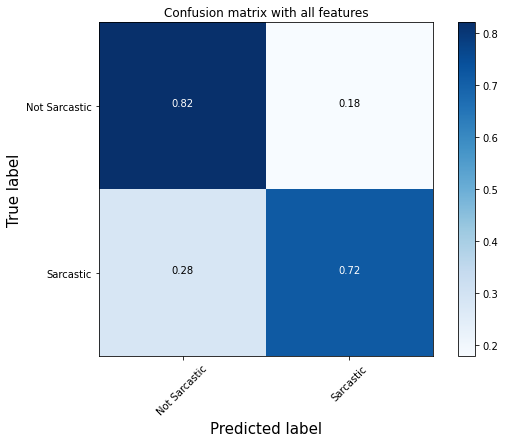

In [26]:
X_train_dtm, X_test_dtm = BoW_representation()
y_pred_class_train, y_pred_class = svm(X_train_dtm, y_train, X_test_dtm)

# calculate evaluation measures:
print("Prediction at training data")
print_metrics(y_train, y_pred_class_train)
print()
print("Prediction at testing data")
print_metrics(y_test, y_pred_class)

get_confusion_matrix(y_test, y_pred_class)

## Trying TF-IDF representation of text with the same settings

### NB on TF-IDF

In [27]:
## TF-IDF text representation for train_X and test_X
X_train_tfidf, X_test_tfidf = tf_idf_representation()

train data: (19951, 23705) test data: (6651, 23705)


Wall time: 14 ms
Prediction at training data
Accuracy:  0.9085258884266453
F1 Score:  0.8880574127461204

Prediction at testing data
Accuracy:  0.793113817471057
F1 Score:  0.7311449785072294


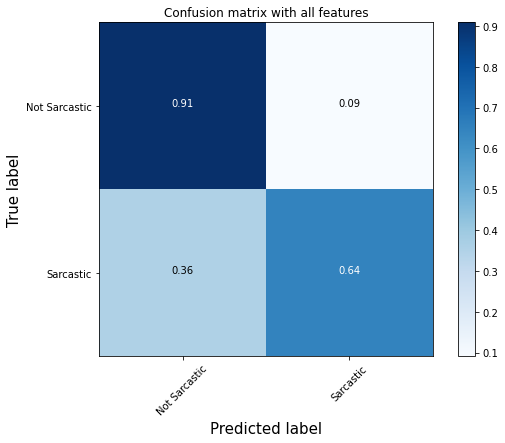

In [28]:
y_pred_class_train, y_pred_class = naive_bayes(X_train_tfidf, y_train, X_test_tfidf)

# Print accuracy:
print("Prediction at training data")
print_metrics(y_train, y_pred_class_train)
print()
print("Prediction at testing data")
print_metrics(y_test, y_pred_class)
# print the confusion matrix
get_confusion_matrix(y_test, y_pred_class)

### Logictic regression on TF-IDF

Prediction at training data
Accuracy:  0.9079745376171621
F1 Score:  0.8963180483397335

Prediction at testing data
Accuracy:  0.7965719440685611
F1 Score:  0.7670053383847081


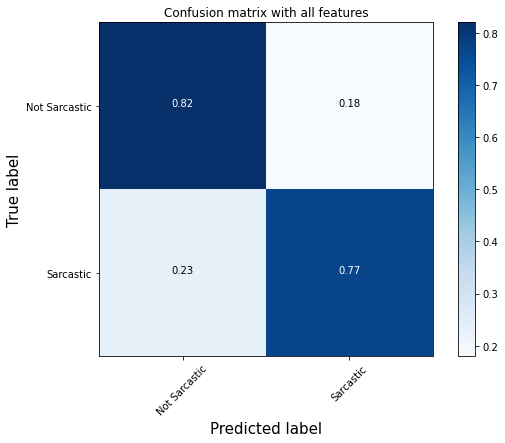

In [29]:
y_pred_class_train, y_pred_class = logistic_regression(X_train_tfidf, y_train,  X_test_tfidf)

# calculate evaluation measures:
print("Prediction at training data")
print_metrics(y_train, y_pred_class_train)
print()
print("Prediction at testing data")
print_metrics(y_test, y_pred_class)

get_confusion_matrix(y_test, y_pred_class)

### SVM on TF-IDF

train data: (19951, 5000) test data: (6651, 5000)
Prediction at training data
Accuracy:  0.8895293468999048
F1 Score:  0.875339366515837

Prediction at testing data
Accuracy:  0.7758231844835363
F1 Score:  0.742086144265698


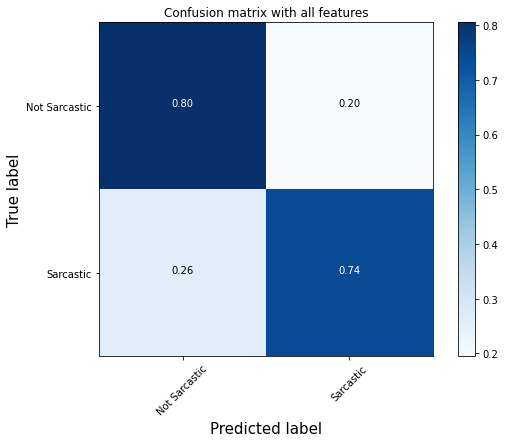

In [30]:
X_train_tfidf, X_test_tfidf = tf_idf_representation(max_features=5000)
y_pred_class_train, y_pred_class = svm(X_train_tfidf, y_train, X_test_tfidf)

# calculate evaluation measures:
print("Prediction at training data")
print_metrics(y_train, y_pred_class_train)
print()
print("Prediction at testing data")
print_metrics(y_test, y_pred_class)

get_confusion_matrix(y_test, y_pred_class)

### word2vec

In [31]:
X_train

12897    victoria's secret introduces 3-inch patch of s...
23365                             the power of perspective
17425    democrats fear that expectations for donald tr...
15768     how we became the heaviest drinkers in a century
7287     what the trump team should consider before axi...
                               ...                        
11018                 rain told to go away in 1986 returns
17384    woman already off to bad start as mother after...
5225     anne hathaway, james franco spend every moment...
12245    area woman insists on helping coworker through...
236      discover how climate change is rapidly transfo...
Name: headline, Length: 19951, dtype: object

In [39]:
X_train_we, X_test_we = word2Vec()

Prediction at training data
Accuracy:  0.7073830885669892
F1 Score:  0.6794069192751235

Prediction at testing data
Accuracy:  0.7001954593294242
F1 Score:  0.667888074616922


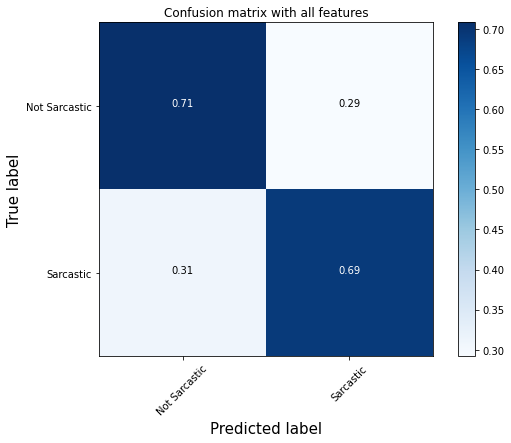

In [40]:
# Preprocess and Vectorize train and test data

y_pred_class_train, y_pred_class = logistic_regression(X_train_we, y_train, X_test_we)

# Print accuracy:
print("Prediction at training data")
print_metrics(y_train, y_pred_class_train)
print()
print("Prediction at testing data")
print_metrics(y_test, y_pred_class)
# print the confusion matrix
get_confusion_matrix(y_test, y_pred_class)

Prediction at training data
Accuracy:  0.7078843165756102
F1 Score:  0.6798505822896067

Prediction at testing data
Accuracy:  0.7007968726507292
F1 Score:  0.6683333333333333


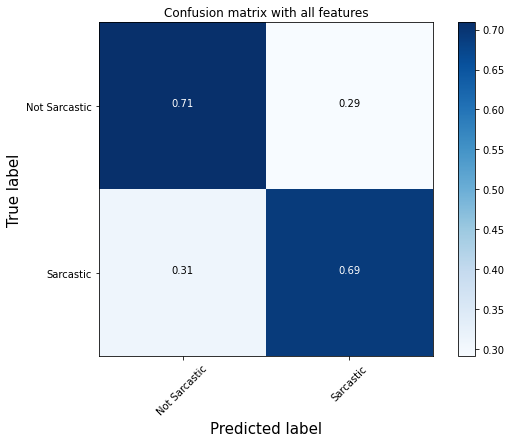

In [41]:
y_pred_class_train, y_pred_class = svm(X_train_we, y_train, X_test_we)

# Print accuracy:
print("Prediction at training data")
print_metrics(y_train, y_pred_class_train)
print()
print("Prediction at testing data")
print_metrics(y_test, y_pred_class)
# print the confusion matrix
get_confusion_matrix(y_test, y_pred_class)

### trying LSTM

In [16]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Flatten, Bidirectional
from tensorflow.keras.models import Model, Sequential

In [17]:
max_features = 10000  ## no of unique words in the vocabulary
maxlen = 15 ## no of words to use from each headline
embedding_size = 100 ## length of word embedding

In [18]:
tokenizer = Tokenizer(
    num_words=max_features+1,
     filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
     lower=True,
     split=" ",
     oov_token = True)

In [19]:
tokenizer.fit_on_texts(data_s['headline'])

In [20]:
data_s.head(2)

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0


In [21]:
data_s['tokenized_headline'] = tokenizer.texts_to_sequences(data_s['headline'])

In [22]:
X = data_s['tokenized_headline']
X = pad_sequences(X, maxlen = maxlen, value=0.0)
y = np.asarray(data_s['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 26602
[   0    0    0  308    1  677 3611 2293   48  382 2566    1    6 2567
 8413]
Number of Labels:  26602
0


In [23]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a dict"
    return dict(islice(iterable, n))

In [24]:
print('Number of words originally present:', len(tokenizer.word_index) + 1)

print('Numer of words in our vocabulary: ', max_features, '  .Since, we had set num_words argumnet while defining tokenizer object')
num_words = max_features

Number of words originally present: 29658
Numer of words in our vocabulary:  10000   .Since, we had set num_words argumnet while defining tokenizer object


In [25]:
vocab = take(num_words, tokenizer.word_index.items())

In [60]:
words = set(tokenizer.word_index.keys())

In [64]:
len(words)

29657

In [63]:
embeddings_words = embeddings.keys()

In [65]:
intersect_word = words.intersection(embeddings_words)

In [67]:
len(intersect_word)/ 29657

0.8009913342549819

In [49]:
words=tokenizer.word_index.items()

In [26]:
embedding_matrix = np.zeros((num_words+1, 100))

embeddings = make_embedding_dict()
for word, i in vocab.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

In [27]:
### Embedding layer for hint 
## model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
### Bidirectional LSTM layer for hint 
## model.add(Bidirectional(LSTM(128, return_sequences = True)))

# Define the Keras model
model = Sequential()
model.add(Embedding(num_words + 1, embedding_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model.add(Dropout(0.50))

model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.50))

model.add(Flatten())
model.add(Dropout(0.50))

model.add(Dense(1, activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 100)           1000100   
_________________________________________________________________
dropout (Dropout)            (None, 15, 100)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 15, 256)           234496    
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 256)           0         
_________________________________________________________________
flatten (Flatten)            (None, 3840)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 3840)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3

In [29]:
##Model Configuration
batch_size = 100
number_of_epochs = 10

loss_function = 'binary_crossentropy'
optimizer = 'adam'
additional_metrics = ['accuracy']
verbosity_mode = True

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19951, 15), (6651, 15), (19951,), (6651,))

In [32]:
X_train

array([[   0,    0, 6831, ..., 4579,    8,  299],
       [   0,    0,    0, ...,  355,    3, 2359],
       [   0,    0,  376, ..., 2418,  151,  768],
       ...,
       [   0,    0, 2812, ...,   43, 6602,    1],
       [   0,    0,    0, ...,  174,  607,  503],
       [   0,    0,    0, ...,   10,  909,    1]])

In [33]:
# Compile the model
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

# Train the model
history = model.fit(X_train, y_train, epochs=number_of_epochs,
                    batch_size=batch_size, 
                    verbose=verbosity_mode, 
                    validation_data=(X_test,y_test))

Epoch 1/10
200/200 [==============================] - 31s 100ms/step - loss: 0.6108 - accuracy: 0.6618 - val_loss: 0.5339 - val_accuracy: 0.7396
Epoch 2/10
200/200 [==============================] - 18s 92ms/step - loss: 0.5340 - accuracy: 0.7336 - val_loss: 0.4514 - val_accuracy: 0.7927
Epoch 3/10
200/200 [==============================] - 19s 93ms/step - loss: 0.4771 - accuracy: 0.7721 - val_loss: 0.3881 - val_accuracy: 0.8295
Epoch 4/10
200/200 [==============================] - 21s 103ms/step - loss: 0.4422 - accuracy: 0.7903 - val_loss: 0.4087 - val_accuracy: 0.8078
Epoch 5/10
200/200 [==============================] - 18s 92ms/step - loss: 0.4261 - accuracy: 0.7993 - val_loss: 0.3644 - val_accuracy: 0.8381
Epoch 6/10
200/200 [==============================] - 19s 94ms/step - loss: 0.4019 - accuracy: 0.8170 - val_loss: 0.3543 - val_accuracy: 0.8402
Epoch 7/10
200/200 [==============================] - 18s 91ms/step - loss: 0.3925 - accuracy: 0.8222 - val_loss: 0.3475 - val_accurac

In [34]:
y_pred_prob = model.predict(X_test)
y_pred_prob_train = model.predict(X_train)

In [35]:
def get_class(y_pred_prob):
  prob_list = []
  for i in y_pred_prob:
    prob_list.append(i[0])
  y_pred_class = [1 if p > 0.5 else 0 for p in prob_list]
  return y_pred_class

In [36]:
y_pred_class = get_class(y_pred_prob)
y_pred_class_train = get_class(y_pred_prob_train)

In [44]:
def print_metrics(y_test, y_pred_class):
  print("Accuracy: ", accuracy_score(y_test, y_pred_class))
  print("F1 Score: ", f1_score(y_test, y_pred_class))
  # print("AUC: ", roc_auc_score(y_test, y_pred_prob))

In [45]:
# calculate evaluation measures:
# print("Prediction at training data")
print_metrics(y_train, y_pred_class_train)
print()
print("Prediction at testing data")
print_metrics(y_test, y_pred_class)

get_confusion_matrix(y_test, y_pred_class)

Accuracy:  0.8874743120645582
F1 Score:  0.8673716547527618

Prediction at testing data
Accuracy:  0.8500977296647121
F1 Score:  0.8213581795377173


NameError: name 'confusion_matrix' is not defined

###  Saving the selected trained model for usage during deployment time

In [68]:
## saving both the model architectuire and weights

## model architecture
model_json = model.to_json()
with open("model_v1.json", "w") as json_file:
    json_file.write(model_json)

## model weights
model.save_weights("model_v1.h5")

In [ ]:
## using the saved model

from keras.models import model_from_json

## load model architecture
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

## load model weights
loaded_model.load_weights("model.h5")

In [70]:
import pickle

In [71]:
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)